<a href="https://colab.research.google.com/github/gar22891uvg/ProyectoFinalGRP4/blob/main/GRP4ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
df = pd.read_csv('REC3.csv', parse_dates=True)

In [11]:
df.head(5)

,FECHA,NOMBRE,CODIGO,traff,qty,DELAY
0,01-Nov-22,Internac,1,9798,810163,155
1,01-Nov-22,direct1,2,6766,117926,163
2,01-Nov-22,dist1,3,6420,96564,164
3,01-Nov-22,digi1,4,2446,58314,154
4,01-Nov-22,online2,6,2276,56139,100


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5175 entries, 0 to 5174
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FECHA   5175 non-null   object
 1   NOMBRE  5175 non-null   object
 2   CODIGO  5175 non-null   int64 
 3   traff   5175 non-null   int64 
 4   qty     5175 non-null   int64 
 5   DELAY   5175 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 242.7+ KB


In [13]:
df = pd.read_csv('REC3.csv', parse_dates=True,index_col=0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5175 entries, 2022-11-01 to 2023-05-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOMBRE  5175 non-null   object
 1   CODIGO  5175 non-null   int64 
 2   traff   5175 non-null   int64 
 3   qty     5175 non-null   int64 
 4   DELAY   5175 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.6+ KB


In [15]:
df = df.sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5175 entries, 2022-11-01 to 2023-05-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOMBRE  5175 non-null   object
 1   CODIGO  5175 non-null   int64 
 2   traff   5175 non-null   int64 
 3   qty     5175 non-null   int64 
 4   DELAY   5175 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.6+ KB


In [16]:
df.head(5)

,NOMBRE,CODIGO,traff,qty,DELAY
FECHA,,,,,
2022-11-01,Internac,1,9798,810163,155
2022-11-01,direct1,2,6766,117926,163
2022-11-01,dist1,3,6420,96564,164
2022-11-01,digi1,4,2446,58314,154
2022-11-01,online2,6,2276,56139,100


In [17]:
df.index.year.unique()

Int64Index([2022, 2023], dtype='int64', name='FECHA')

In [18]:
df.head(5)

,NOMBRE,CODIGO,traff,qty,DELAY
FECHA,,,,,
2022-11-01,Internac,1,9798,810163,155
2022-11-01,direct1,2,6766,117926,163
2022-11-01,dist1,3,6420,96564,164
2022-11-01,digi1,4,2446,58314,154
2022-11-01,online2,6,2276,56139,100


In [23]:
df_cl = df[df.NOMBRE=='Internac'][['CODIGO'	,'traff','qty','DELAY']] # let's focus on Internac
df_cl ['traff_x1000']= df_cl.traff/1000 # transform 
df_cl ['delay_x1000']= df_cl.DELAY/1000 # transform 
df_cl['part_of_the_week']=df_cl.index.weekday.map(lambda x: 'Weekday' if x<5 else 'Weekend')

In [24]:
df_cl.index.duplicated().sum()

193

In [25]:
df_cl

,CODIGO,traff,qty,DELAY,traff_x1000,delay_x1000,part_of_the_week
FECHA,,,,,,,
2022-11-01,1,9798,810163,155,9.798,0.155,Weekday
2022-11-01,1,1419,80677,139,1.419,0.139,Weekday
2022-11-02,1,8928,743973,187,8.928,0.187,Weekday
2022-11-02,1,1238,70199,161,1.238,0.161,Weekday
2022-11-03,1,8709,728152,165,8.709,0.165,Weekday
...,...,...,...,...,...,...,...
2023-05-10,1,1159,65840,209,1.159,0.209,Weekday
2023-05-11,1,7834,662708,186,7.834,0.186,Weekday
2023-05-11,1,870,49853,175,0.870,0.175,Weekday


In [27]:
sns.set_style("darkgrid") # Others whitegrid, white, dark, ticks https://www.python-graph-gallery.com/104-seaborn-themes 

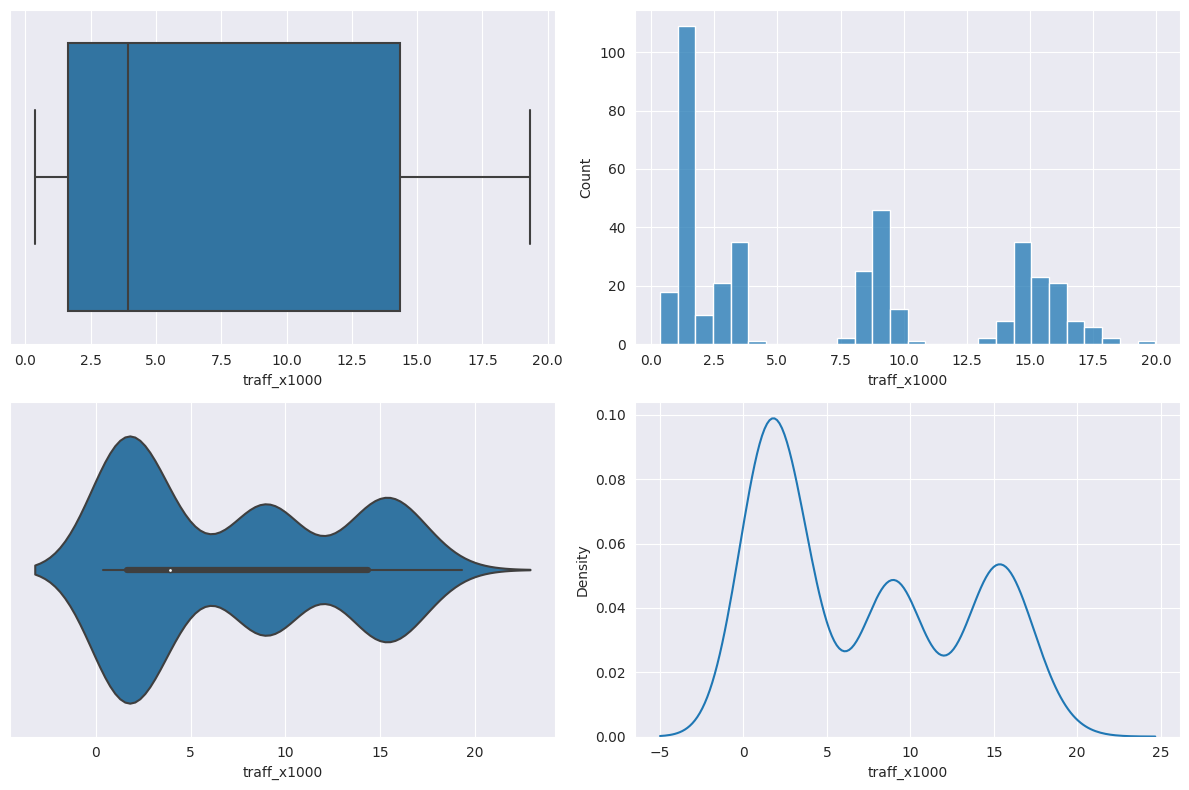

In [28]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=df_cl, x='traff_x1000', orient='h', ax=axs[0,0])
sns.histplot(data=df_cl,x='traff_x1000', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=df_cl,x='traff_x1000', ax=axs[1,0])
sns.kdeplot(data=df_cl, x='traff_x1000', ax=axs[1,1])
plt.tight_layout()

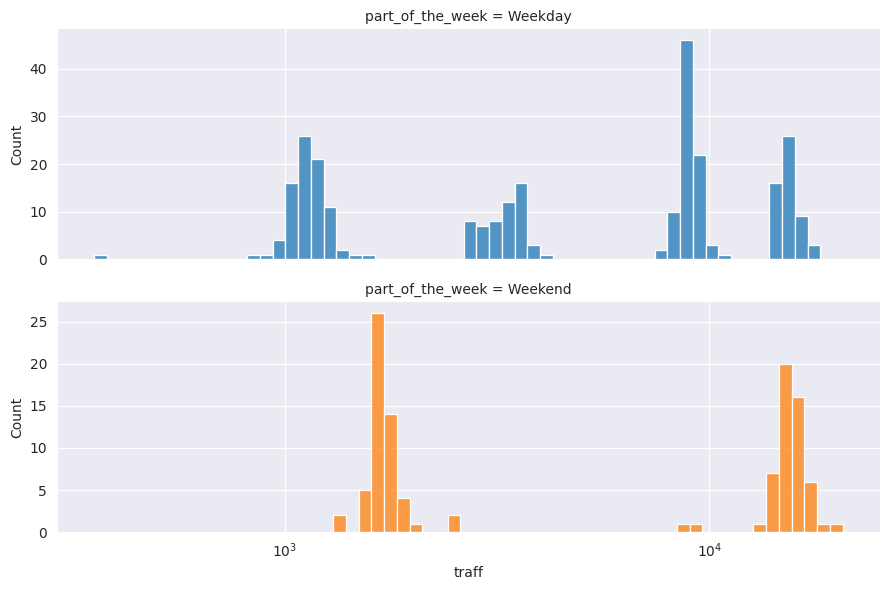

In [29]:
g = sns.FacetGrid(df_cl, sharey=False, row='part_of_the_week',  hue='part_of_the_week',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='traff', log_scale=True, binwidth=0.03)

In [31]:
df_cl['two_week_lag_traff'] = df_cl['traff'].shift(periods=14, fill_value = 0) # We create a lagging variable of two weeks
df_cl ['two_week_lag_traff_x1000']= df_cl['two_week_lag_traff']/1000

In [32]:
df_cl.head(16)

,CODIGO,traff,qty,DELAY,traff_x1000,delay_x1000,part_of_the_week,two_week_lag_traff,two_week_lag_traff_x1000
FECHA,,,,,,,,,
2022-11-01,1,9798,810163,155,9.798,0.155,Weekday,0,0.000
2022-11-01,1,1419,80677,139,1.419,0.139,Weekday,0,0.000
2022-11-02,1,8928,743973,187,8.928,0.187,Weekday,0,0.000
2022-11-02,1,1238,70199,161,1.238,0.161,Weekday,0,0.000
2022-11-03,1,8709,728152,165,8.709,0.165,Weekday,0,0.000
2022-11-03,1,1147,65234,146,1.147,0.146,Weekday,0,0.000
2022-11-04,1,16132,1260035,145,16.132,0.145,Weekday,0,0.000
2022-11-04,1,3541,198094,129,3.541,0.129,Weekday,0,0.000
2022-11-05,1,15359,1281010,162,15.359,0.162,Weekend,0,0.000


<Axes: xlabel='two_week_lag_traff_x1000', ylabel='traff_x1000'>

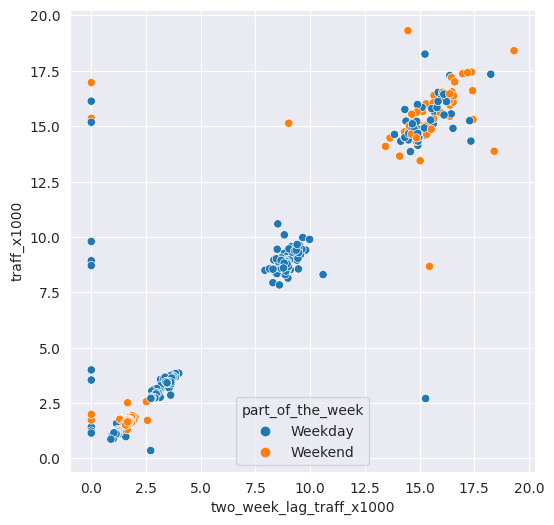

In [33]:
plt.figure(figsize=(6,6)) 
sns.scatterplot(data=df_cl, x='two_week_lag_traff_x1000', y='traff_x1000', hue='part_of_the_week')